In [1]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
top1= '/home/augustine/Nucleosome_system/1kx5/1kx5_0.15M/1kx5_015M_OPC.prmtop'
#traj1='/home/augustine/Nucleosome_system/1kx5/1kx5_0.15M/wt/wt_300ns1.xtc'
traj1='/home/augustine/Nucleosome_system/1kx5/1kx5_0.15M/1kx5_comb_300ns.nc'
u1 = mda.Universe(top1, traj1)

topology_E76K= '/home/augustine/Nucleosome_system/E76K/E76K_0.15M/E76K_15M_OPC.prmtop'
trajectory_E76K='/home/augustine/Nucleosome_system/E76K/E76K_0.15M/prod/MMGBSA/MMGBSA_H4_H2B/E76K_015M_300ns_short.nc'
u2 = mda.Universe(topology_E76K, trajectory_E76K)

topology_R92T= '/home/augustine/Nucleosome_system/R92T/R92T_1/R92T_0.15M/R92T_015M_OPC.prmtop'
trajectory_R92T='/home/augustine/Nucleosome_system/R92T/R92T_1/R92T_0.15M/prod_300ns/R92T_015M_300ns_wrap.xtc'
u3 = mda.Universe(topology_R92T, trajectory_R92T)
#0.15M

/home/augustine/anaconda3/envs/mdaenv/lib/python3.9/site-packages/MDAnalysis/topology/TOPParser.py:295: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(msg)


In [2]:
##Calculating Contact Maps at H4 and H2B Helix Interface
#Wild_type
from MDAnalysis.analysis import distances
sel1 = u1.select_atoms('resid 511-522')
sel2 = u1.select_atoms('resid 727-740')
avg = np.zeros((12,14), dtype=float)
for ts in u1.trajectory:
    sel1_com = sel1.center_of_mass(compound='residues')
    sel2_com = sel2.center_of_mass(compound='residues')
    res_dist = distances.distance_array(sel1_com, sel2_com,
                                    box=u1.dimensions)
    avg = avg + res_dist
res_dist_avg= avg/len(u1.trajectory)
print(res_dist_avg)
n_LID = len(sel1_com)
n_NMP = len(sel2_com)
DH = pd.DataFrame(res_dist_avg)
DH.to_csv("Contact_1kx5_300ns.csv")

[[26.80337595 24.38779547 22.9494541  22.93453762 20.44891685 17.25068553
  18.66878334 19.04416419 16.26223711 13.98302193 16.0750564  15.53502071
  11.27677681 12.20314644]
 [26.47453281 23.9998428  23.5765708  23.41843933 20.54364315 17.47214408
  19.69920985 19.63586797 16.13419238 15.36828834 17.55411218 16.04150914
  11.81242981 14.46475005]
 [23.63845906 21.89285991 21.10172352 20.32845328 17.41435317 14.8349711
  16.58746852 16.04444496 12.851395   12.3471427  13.9421298  11.99798883
   8.07709896 11.2558616 ]
 [22.76789388 20.12929859 18.86386961 19.10864158 16.62303847 13.18458816
  15.0971091  15.78558947 12.64707822 10.66984182 13.61908823 13.45264574
   8.63936456 10.75876649]
 [23.91337583 20.62334355 20.83786559 21.44142932 18.64634572 15.0916886
  18.22538359 18.78498521 14.73435525 14.42266459 17.70826526 16.82246896
  12.06370405 15.51351707]
 [21.5462709  19.00053568 19.70981958 19.53713502 16.38132137 13.48912274
  16.78251422 16.51241344 12.17039867 13.42358293 16.

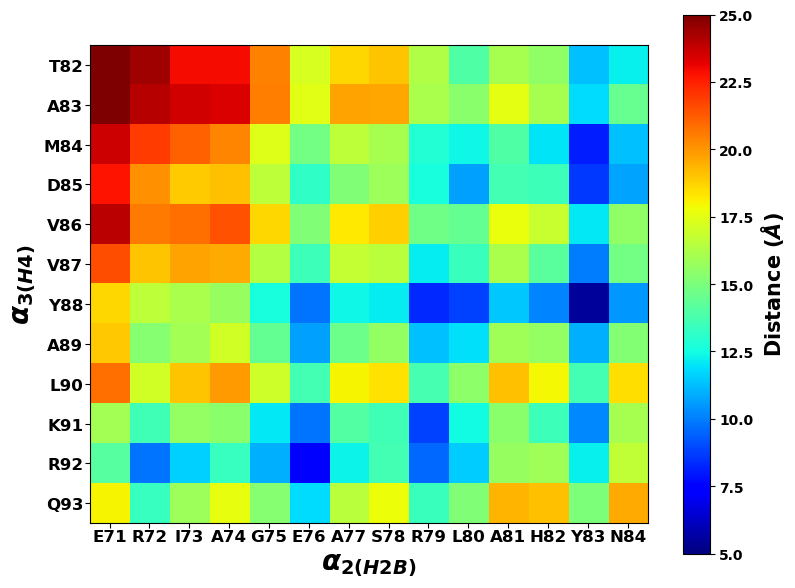

In [9]:
fig2, ax2 = plt.subplots(figsize=(9, 7))
im = ax2.imshow(res_dist_avg, origin='upper',  cmap = 'jet', vmin=5, vmax=25)
plt.ylabel(r"$\alpha_{3(H4)}$", fontsize = 20.0, fontweight="bold")
plt.xlabel(r"$\alpha_{2(H2B)}$", fontsize = 20.0, fontweight="bold")
h3=['T82','A83', 'M84', 'D85', 'V86', 'V87', 'Y88', 'A89', 'L90', 'K91', 'R92', 'Q93']
h2b = ['E71','R72', 'I73', 'A74', 'G75', 'E76', 'A77', 'S78', 'R79', 'L80', 'A81', 'H82', 'Y83', 'N84']
#plt.title('Distance between Adjacent residues')
plt.tick_params(labelsize=12, pad=1)
# add residue ID labels to axes
tick_interval =1
ax2.set_yticks(np.arange(n_LID)[::tick_interval])
ax2.set_xticks(np.arange(n_NMP)[::tick_interval])
ax2.set_yticklabels(h3)
ax2.set_xticklabels(h2b)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# colorbar
cbar2 = fig2.colorbar(im)
cbar2.ax.set_ylabel('Distance ($\AA$)', fontsize = 15.0)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig("Contact_Map_015M_1kx5.svg",format='svg', dpi=300)

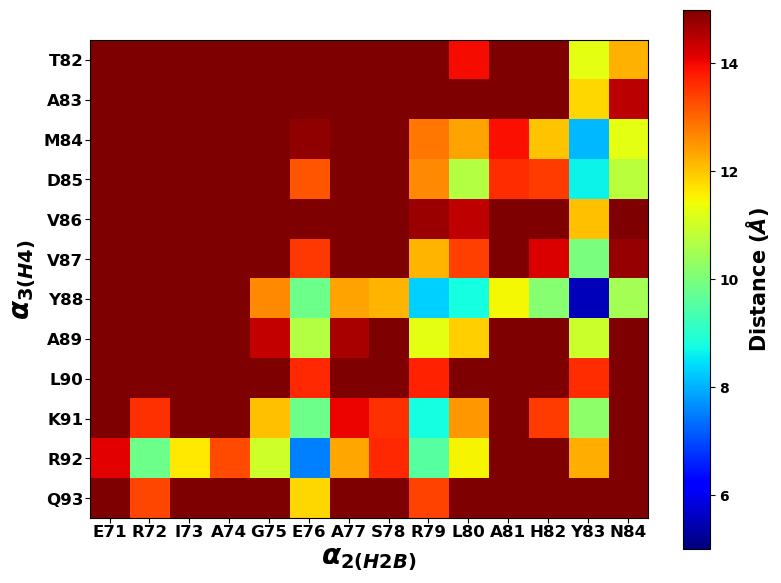

In [8]:
fig2, ax2 = plt.subplots(figsize=(9, 7))
h3=['T82','A83', 'M84', 'D85', 'V86', 'V87', 'Y88', 'A89', 'L90', 'K91', 'R92', 'Q93']
h2b = ['E71','R72', 'I73', 'A74', 'G75', 'E76', 'A77', 'S78', 'R79', 'L80', 'A81', 'H82', 'Y83', 'N84']
im = ax2.imshow(res_dist_avg, origin='upper',  cmap = 'jet', vmin=5, vmax=15)
plt.ylabel(r"$\alpha_{3(H4)}$", fontsize = 20.0, fontweight="bold")
plt.xlabel(r"$\alpha_{2(H2B)}$", fontsize = 20.0, fontweight="bold")
#plt.title('Distance between Adjacent residues')
plt.tick_params(labelsize=12, pad=1)
# add residue ID labels to axes
tick_interval =1
ax2.set_yticks(np.arange(n_LID)[::tick_interval])
ax2.set_xticks(np.arange(n_NMP)[::tick_interval])
# ax2.set_yticklabels(sel1.residues.resids[::tick_interval])
# ax2.set_xticklabels(sel2.residues.resids[::tick_interval])
ax2.set_yticklabels(h3)
ax2.set_xticklabels(h2b)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# colorbar
cbar2 = fig2.colorbar(im)
cbar2.ax.set_ylabel('Distance ($\AA$)', fontsize = 15.0)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig("Contact_015M_1kx5.svg", format='svg', dpi=300)

In [10]:
##Calculating Contact Maps at H4 and H2B Helix Interface
#E76K
from MDAnalysis.analysis import distances
sel1 = u2.select_atoms('resid 511-522')
sel2 = u2.select_atoms('resid 727-740')
avg = np.zeros((12,14), dtype=float)
for ts in u2.trajectory:
    sel1_com = sel1.center_of_mass(compound='residues')
    sel2_com = sel2.center_of_mass(compound='residues')
    res_dist = distances.distance_array(sel1_com, sel2_com,
                                    box=u2.dimensions)
    avg = avg + res_dist
res_dist_avg2= avg/len(u2.trajectory)
print(res_dist_avg2)
n_LID = len(sel1_com)
n_NMP = len(sel2_com)
DH = pd.DataFrame(res_dist_avg2)
DH.to_csv("Contact_E76K_300ns.csv")

[[27.20404762 25.56732708 23.6273584  23.70632462 21.44052112 18.60619149
  19.45566771 19.92698133 17.1107372  14.70938282 16.85060643 16.34869337
  12.22619233 13.24438572]
 [26.90684863 25.07590498 24.1751379  24.14154586 21.45160564 18.65685694
  20.35461338 20.37492669 16.87919176 15.86099787 18.16284657 16.65511933
  12.50749354 15.35034707]
 [23.51137228 22.53232068 21.30564337 20.59657312 17.81688542 15.65182984
  16.7619709  16.25577351 12.69573643 12.35320964 14.05965137 12.06962203
   8.20328129 11.69896037]
 [23.02556972 21.23268844 19.43797744 19.68715734 17.40686119 14.35782707
  15.66934733 16.37548214 13.59070928 11.1057901  14.02200755 13.81224603
   9.19343779 11.44312466]
 [24.20769567 21.52692953 21.19551251 21.87627166 19.28145815 15.87838315
  18.59920996 19.20691327 15.84275403 14.57805512 17.96342493 17.0530341
  12.39343695 16.1246755 ]
 [22.10368275 20.12158031 20.33651812 20.24290682 17.21776441 14.5008558
  17.28907509 17.02736677 13.07900009 13.58462904 16.

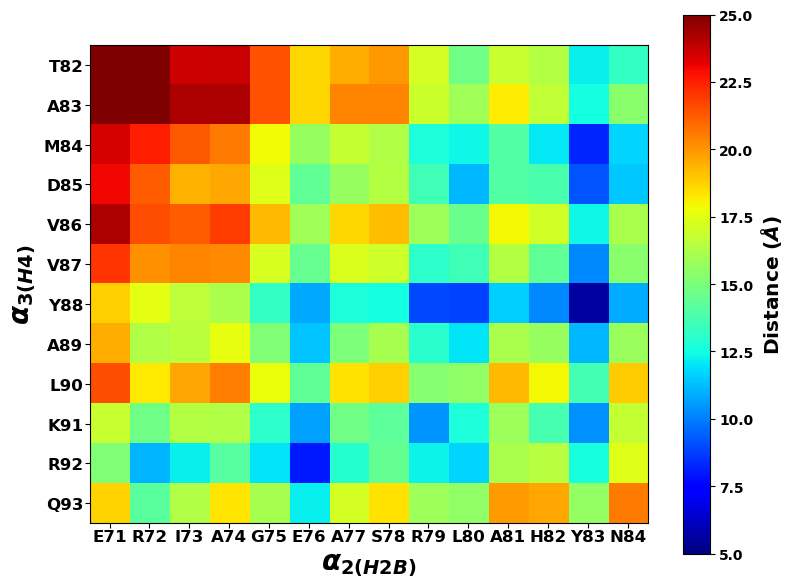

In [11]:
fig2, ax2 = plt.subplots(figsize=(9, 7))
#plt.style.use('seaborn-poster')
im = ax2.imshow(res_dist_avg2, origin='upper', cmap = 'jet', vmin=5, vmax=25)
plt.ylabel(r"$\alpha_{3(H4)}$", fontsize = 20.0, fontweight="bold")
plt.xlabel(r"$\alpha_{2(H2B)}$", fontsize = 20.0, fontweight="bold")
h3=['T82','A83', 'M84', 'D85', 'V86', 'V87', 'Y88', 'A89', 'L90', 'K91', 'R92', 'Q93']
h2b = ['E71','R72', 'I73', 'A74', 'G75', 'E76', 'A77', 'S78', 'R79', 'L80', 'A81', 'H82', 'Y83', 'N84']
#plt.title('Distance between Adjacent residues')
plt.tick_params(labelsize=12, pad=1)
# add residue ID labels to axes
tick_interval =1
ax2.set_yticks(np.arange(n_LID)[::tick_interval])
ax2.set_xticks(np.arange(n_NMP)[::tick_interval])
# ax2.set_yticklabels(sel1.residues.resids[::tick_interval])
# ax2.set_xticklabels(sel2.residues.resids[::tick_interval])
ax2.set_yticklabels(h3)
ax2.set_xticklabels(h2b)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# colorbar
cbar2 = fig2.colorbar(im)
cbar2.ax.set_ylabel('Distance ($\AA$)', fontsize = 14.5)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig("Contact_Map_015M_E76K.svg", format='svg', dpi=300)

/tmp/ipykernel_337563/3213002474.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(h3)
/tmp/ipykernel_337563/3213002474.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(h2b)


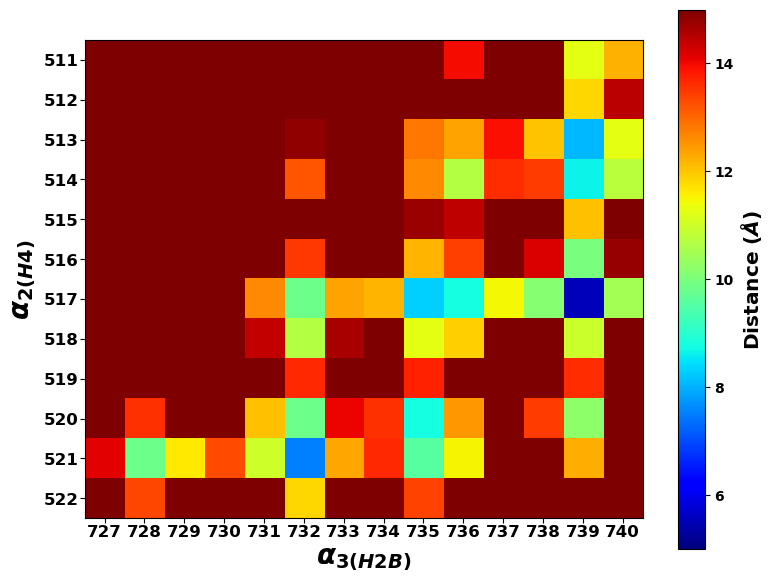

In [12]:
fig2, ax2 = plt.subplots(figsize=(9, 7))
#plt.style.use('seaborn-poster')
h3=['T82','A83', 'M84', 'D85', 'V86', 'V87', 'Y88', 'A89', 'L90', 'K91', 'R92', 'Q93']
h2b = ['E71','R72', 'I73', 'A74', 'G75', 'E76', 'A77', 'S78', 'R79', 'L80', 'A81', 'H82', 'Y83', 'N84']
im = ax2.imshow(res_dist_avg, origin='upper', cmap = 'jet', vmin=5, vmax=15)
plt.ylabel(r"$\alpha_{2(H4)}$", fontsize = 20.0, fontweight="bold")
plt.xlabel(r"$\alpha_{3(H2B)}$", fontsize = 20.0, fontweight="bold")
#plt.title('Distance between Adjacent residues')
plt.tick_params(labelsize=12, pad=1)
ax2.set_yticklabels(h3)
ax2.set_xticklabels(h2b)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# add residue ID labels to axes
tick_interval =1
ax2.set_yticks(np.arange(n_LID)[::tick_interval])
ax2.set_xticks(np.arange(n_NMP)[::tick_interval])
ax2.set_yticklabels(sel1.residues.resids[::tick_interval])
ax2.set_xticklabels(sel2.residues.resids[::tick_interval])

# colorbar
cbar2 = fig2.colorbar(im)
cbar2.ax.set_ylabel('Distance ($\AA$)', fontsize = 14.5)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig("Contact_015M_E76K.svg", format='svg', dpi=300)

In [13]:
##Calculating Contact Maps at H4 and H2B Helix Interface
#R92T
from MDAnalysis.analysis import distances
sel1 = u3.select_atoms('resid 511-522')
sel2 = u3.select_atoms('resid 727-740')
avg = np.zeros((12,14), dtype=float)
for ts in u3.trajectory:
    sel1_com = sel1.center_of_mass(compound='residues')
    sel2_com = sel2.center_of_mass(compound='residues')
    res_dist = distances.distance_array(sel1_com, sel2_com,
                                    box=u3.dimensions)
    avg = avg + res_dist
res_dist_avg3= avg/len(u3.trajectory)
print(res_dist_avg3)
n_LID = len(sel1_com)
n_NMP = len(sel2_com)
DH = pd.DataFrame(res_dist_avg3)
DH.to_csv("Contact_R92T_015M_300ns.csv")

[[26.96444292 25.21525863 23.30341164 23.36107245 21.09761633 17.86446768
  19.06924242 19.5660654  17.08829769 14.37881811 16.54850036 15.9411707
  11.98761455 12.41539701]
 [26.55732397 24.64165686 23.75048621 23.73257654 21.04060587 17.82494469
  19.91801313 19.9827988  16.75188409 15.55360597 17.83363559 16.22801721
  12.23161229 14.48878735]
 [23.31271487 22.22934376 21.02849818 20.33111678 17.551165   14.82276693
  16.47193888 16.00270087 13.06660754 12.19085616 13.85082237 11.7752566
   8.07143057 10.93806305]
 [22.84079358 20.90068609 19.10829163 19.38427605 17.12818423 13.69561002
  15.31987471 16.11031076 13.32832167 10.85759208 13.79755401 13.55383758
   9.0736761  10.67723009]
 [23.86064422 21.09678422 20.73997141 21.4714217  18.88512539 15.22854901
  18.16296182 18.8522435  15.10150827 14.33067108 17.65376673 16.6811887
  12.15131618 15.30339246]
 [21.68818294 19.66827893 19.84233553 19.78980873 16.76498383 13.65225323
  16.81109167 16.61504543 12.55024464 13.33472966 16.0

/tmp/ipykernel_337563/1521783400.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(h3)
/tmp/ipykernel_337563/1521783400.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(h2b)


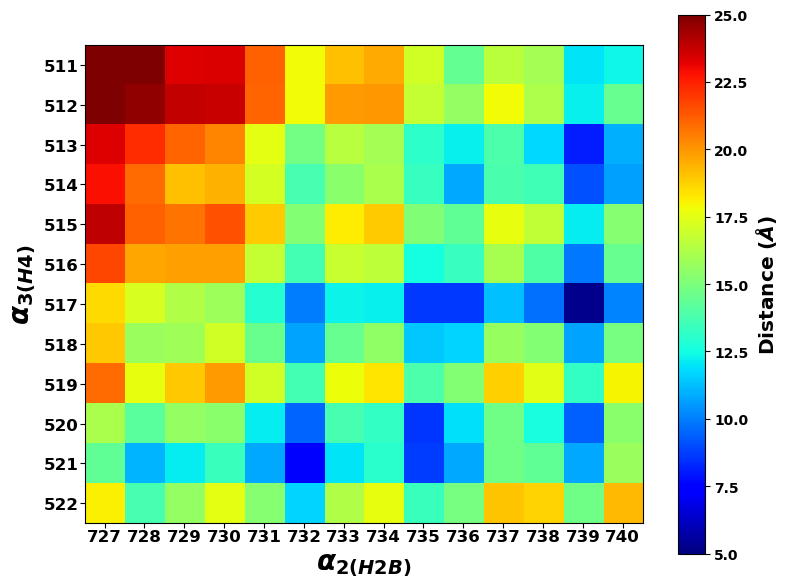

In [15]:
fig2, ax2 = plt.subplots(figsize=(9, 7))
#plt.style.use('seaborn-poster')
h3=['T82','A83', 'M84', 'D85', 'V86', 'V87', 'Y88', 'A89', 'L90', 'K91', 'R92', 'Q93']
h2b = ['E71','R72', 'I73', 'A74', 'G75', 'E76', 'A77', 'S78', 'R79', 'L80', 'A81', 'H82', 'Y83', 'N84']
im = ax2.imshow(res_dist_avg3, origin='upper', cmap = 'jet', vmin=5, vmax=25)
plt.ylabel(r"$\alpha_{3(H4)}$", fontsize = 20.0, fontweight="bold")
plt.xlabel(r"$\alpha_{2(H2B)}$", fontsize = 20.0, fontweight="bold")
#plt.title('Distance between Adjacent residues')
plt.tick_params(labelsize=12, pad=1)
ax2.set_yticklabels(h3)
ax2.set_xticklabels(h2b)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# add residue ID labels to axes
tick_interval =1
ax2.set_yticks(np.arange(n_LID)[::tick_interval])
ax2.set_xticks(np.arange(n_NMP)[::tick_interval])
ax2.set_yticklabels(sel1.residues.resids[::tick_interval])
ax2.set_xticklabels(sel2.residues.resids[::tick_interval])

# colorbar
cbar2 = fig2.colorbar(im)
cbar2.ax.set_ylabel('Distance ($\AA$)', fontsize = 14.5)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig("Contact_Map_015M_R92T.svg", format='svg', dpi=300)

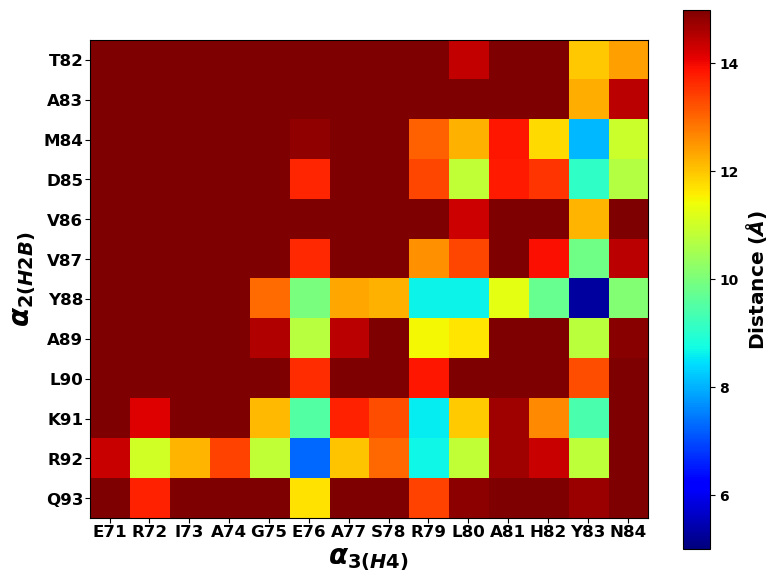

In [16]:
fig2, ax2 = plt.subplots(figsize=(9, 7))
#plt.style.use('seaborn-poster')
h3=['T82','A83', 'M84', 'D85', 'V86', 'V87', 'Y88', 'A89', 'L90', 'K91', 'R92', 'Q93']
h2b = ['E71','R72', 'I73', 'A74', 'G75', 'E76', 'A77', 'S78', 'R79', 'L80', 'A81', 'H82', 'Y83', 'N84']
im = ax2.imshow(res_dist_avg3, origin='upper', cmap = 'jet', vmin=5, vmax=15)
plt.ylabel(r"$\alpha_{2(H2B)}$", fontsize = 20.0, fontweight="bold")
plt.xlabel(r"$\alpha_{3(H4)}$", fontsize = 20.0, fontweight="bold")
#plt.title('Distance between Adjacent residues')
plt.tick_params(labelsize=12, pad=1)
# add residue ID labels to axes
tick_interval =1
ax2.set_yticks(np.arange(n_LID)[::tick_interval])
ax2.set_xticks(np.arange(n_NMP)[::tick_interval])
# ax2.set_yticklabels(sel1.residues.resids[::tick_interval])
# ax2.set_xticklabels(sel2.residues.resids[::tick_interval])
ax2.set_yticklabels(h3)
ax2.set_xticklabels(h2b)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# colorbar
cbar2 = fig2.colorbar(im)
cbar2.ax.set_ylabel('Distance ($\AA$)', fontsize = 14.5)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig("Contact_015M_R92T.svg", format='svg', dpi=300)

### H3/H4_H2A/H2B interface contact map

In [83]:
from MDAnalysis.analysis import distances
sel1 = u1.select_atoms('resid 425-433 489-524')
sel2 = u1.select_atoms('resid 730-761')
avg = np.zeros((45,32), dtype=float)
for ts in u1.trajectory:
    sel1_com = sel1.center_of_mass(compound='residues')
    sel2_com = sel2.center_of_mass(compound='residues')
    res_dist = distances.distance_array(sel1_com, sel2_com,
                                    box=u1.dimensions)
    avg = avg + res_dist
res_dist_avg= avg/len(u1.trajectory)
print(res_dist_avg)
n_LID = len(sel1_com)
n_NMP = len(sel2_com)
DH = pd.DataFrame(res_dist_avg)
DH.to_csv("Contact_interface.csv")

[[27.5023425  25.1147417  22.80312592 ... 19.70809816 22.46454241
  24.79011801]
 [24.23912674 22.4150152  20.18278108 ... 14.98755838 18.19722599
  20.11767453]
 [25.00286732 22.92405544 20.13943542 ... 15.00741345 17.46254955
  19.75814744]
 ...
 [18.0608539  15.47391301 12.27495721 ... 13.23036202 15.26201277
  19.0474458 ]
 [17.94219789 14.97711562 12.83407457 ... 16.6601955  19.40151913
  23.03137231]
 [21.57139252 18.64800012 15.94187989 ... 17.5511817  19.72602817
  23.2923215 ]]


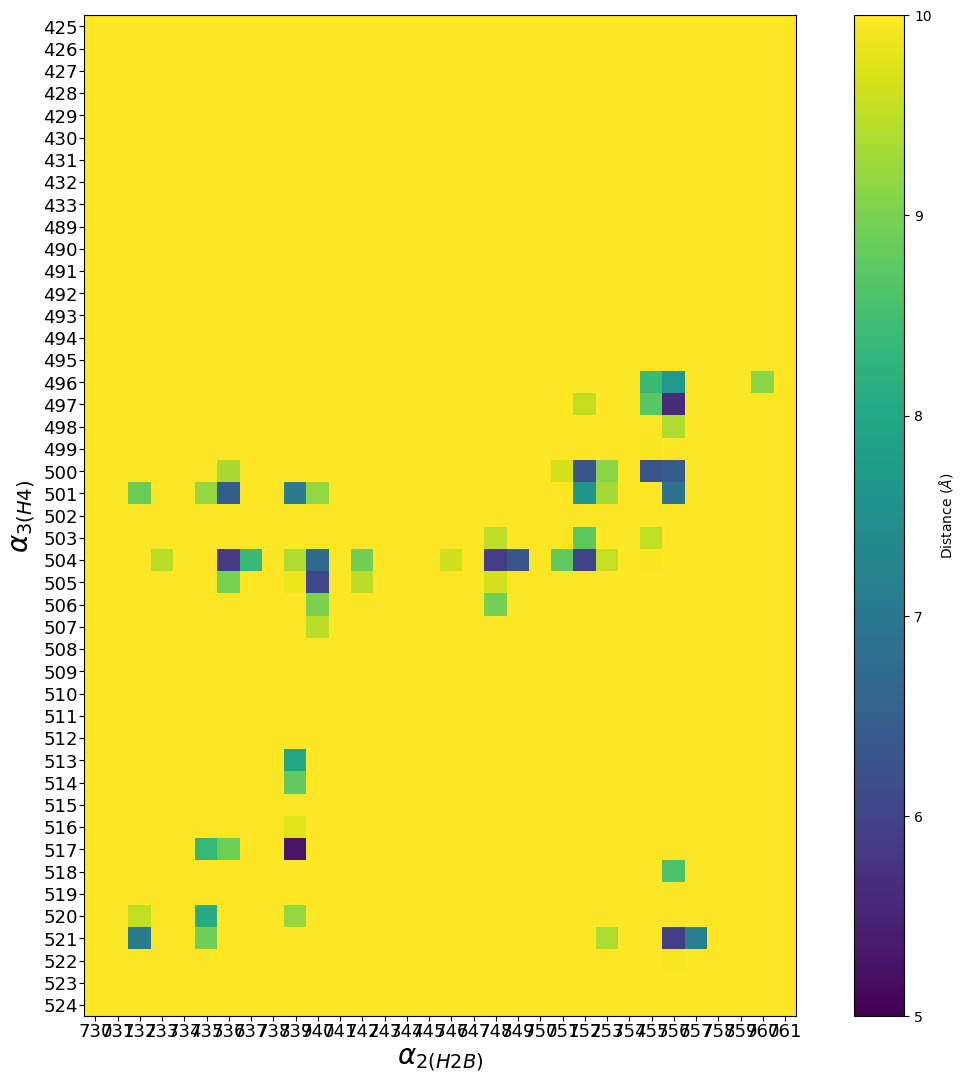

In [84]:
fig2, ax2 = plt.subplots(figsize=(15, 13))
im = ax2.imshow(res_dist_avg, origin='upper',  cmap = 'viridis', vmin=5, vmax=10)
plt.ylabel(r"$\alpha_{3(H4)}$", fontsize = 20.0, fontweight="bold")
plt.xlabel(r"$\alpha_{2(H2B)}$", fontsize = 20.0, fontweight="bold")
#plt.title('Distance between Adjacent residues')
plt.tick_params(labelsize=13, pad=1)
# add residue ID labels to axes
tick_interval =1
ax2.set_yticks(np.arange(n_LID)[::tick_interval])
ax2.set_xticks(np.arange(n_NMP)[::tick_interval])
ax2.set_yticklabels(sel1.residues.resids[::tick_interval])
ax2.set_xticklabels(sel2.residues.resids[::tick_interval])

# colorbar
cbar2 = fig2.colorbar(im)
cbar2.ax.set_ylabel('Distance ($\AA$)')
plt.savefig("Contact_Interface_015M_1kx5.svg",format='svg', dpi=300)